In [2]:
import pandas as pd

seoul = pd.read_csv('card_data/data_seoul.csv', index_col=0, parse_dates=['REG_YYMM'])
seoul.drop('CARD_CCG_NM', axis= 1, inplace = True)
seoul.drop('HOM_CCG_NM', axis= 1, inplace = True)

In [22]:
seoul.SEX_CTGO_CD = seoul.SEX_CTGO_CD.astype(str)
seoul.FLC = seoul.FLC.astype(str)  


In [3]:
import matplotlib.pyplot as plt

# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [23]:
#업종 39개
print(seoul.STD_CLSS_NM.unique())
# seoul.STD_CLSS_NM.nunique()
print(seoul.describe())

['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '면세점' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업'
 '수산물 소매업' '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '여행사업' '욕탕업' '육류 소매업'
 '일반유흥 주점업' '일식 음식점업' '자동차 임대업' '전시 및 행사 대행업' '정기 항공 운송업' '중식 음식점업'
 '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점' '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업'
 '호텔업' '화장품 및 방향제 소매업' '기타 수상오락 서비스업' '내항 여객 운송업' '버스 운송업' '택시 운송업']
          CSTMR_CNT           AMT           CNT
count  6.259502e+06  6.259502e+06  6.259502e+06
mean   7.104782e+01  2.344776e+06  1.588110e+02
std    3.372056e+02  1.369219e+07  1.062606e+03
min    3.000000e+00  2.000000e+01  1.000000e+00
25%    4.000000e+00  1.015000e+05  6.000000e+00
50%    1.100000e+01  3.000000e+05  1.700000e+01
75%    3.400000e+01  1.032000e+06  5.800000e+01
max    1.715200e+04  8.796722e+08  8.867700e+04


Text(0.5, 1.0, 'seoul monthly CSTMR_CNT')

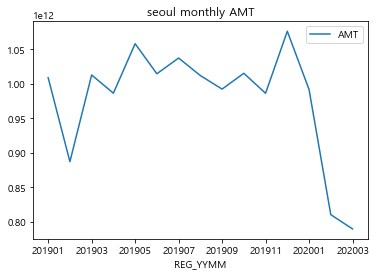

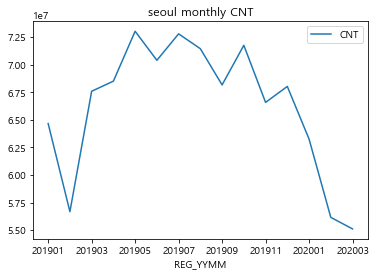

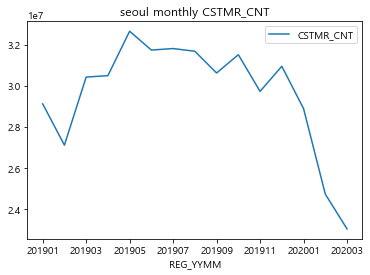

In [4]:
# import matplotlib.pyplot as plt
seoul.pivot_table(index='REG_YYMM', values='AMT', aggfunc=sum).plot()
plt.title('seoul monthly AMT')
seoul.pivot_table(index='REG_YYMM', values='CNT', aggfunc=sum).plot()
plt.title('seoul monthly CNT')
seoul.pivot_table(index='REG_YYMM', values='CSTMR_CNT', aggfunc=sum).plot()
plt.title('seoul monthly CSTMR_CNT')

<Figure size 432x288 with 0 Axes>

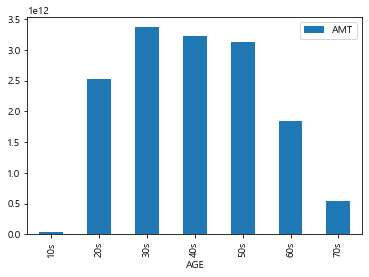

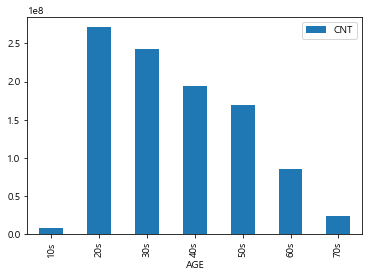

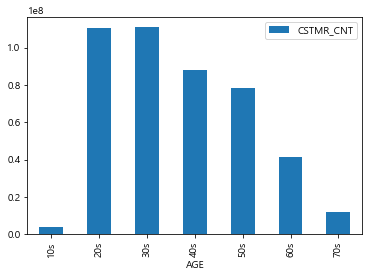

In [5]:
fig = plt.figure()

seoul.pivot_table(index='AGE', values='AMT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='AGE', values='CNT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='AGE', values='CSTMR_CNT', aggfunc=sum).plot(kind = 'bar')

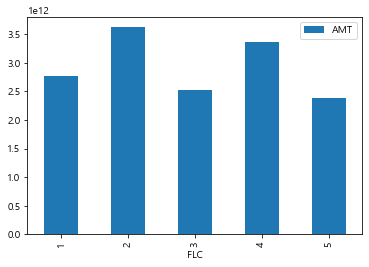

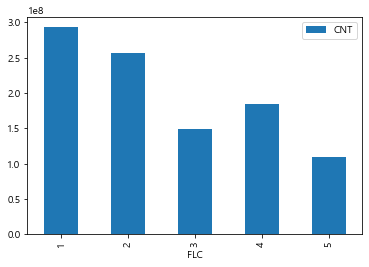

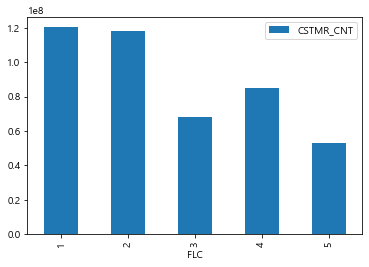

In [6]:

seoul.pivot_table(index='FLC', values='AMT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='FLC', values='CNT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='FLC', values='CSTMR_CNT', aggfunc=sum).plot(kind = 'bar')

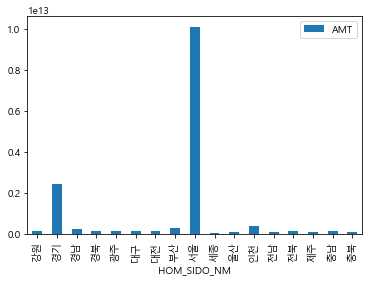

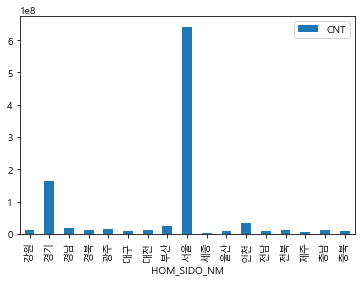

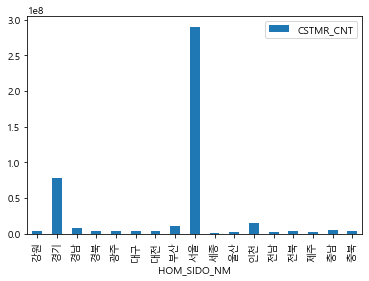

In [7]:
seoul.pivot_table(index='HOM_SIDO_NM', values='AMT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='HOM_SIDO_NM', values='CNT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='HOM_SIDO_NM', values='CSTMR_CNT', aggfunc=sum).plot(kind = 'bar')

In [ ]:
seoul.pivot_table(index='STD_CLSS_NM', values='AMT', aggfunc=sum).plot(kind = 'bar', figsize=(12,10))
plt.title('업종별 AMT')
seoul.pivot_table(index='STD_CLSS_NM', values='CNT', aggfunc=sum).plot(kind = 'bar', figsize=(12,10))
plt.title('업종별 CNT')
seoul.pivot_table(index='STD_CLSS_NM', values='CSTMR_CNT', aggfunc=sum).plot(kind = 'bar', figsize=(12,10))
plt.title('업종별 CSTMR_CNT')


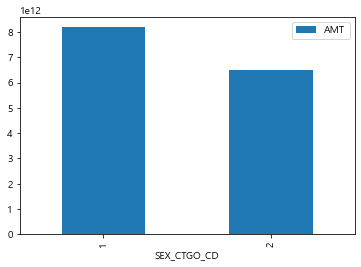

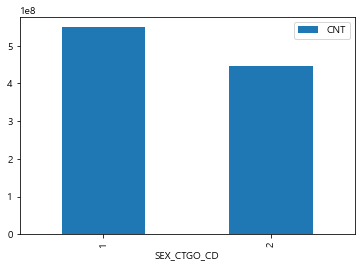

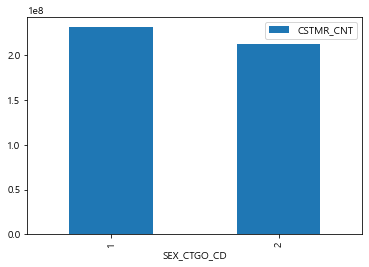

In [9]:
seoul.pivot_table(index='SEX_CTGO_CD', values='AMT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='SEX_CTGO_CD', values='CNT', aggfunc=sum).plot(kind = 'bar')
seoul.pivot_table(index='SEX_CTGO_CD', values='CSTMR_CNT', aggfunc=sum).plot(kind = 'bar')

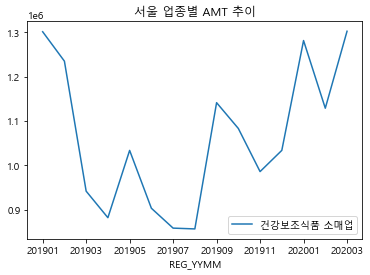

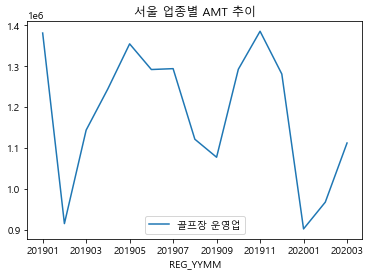

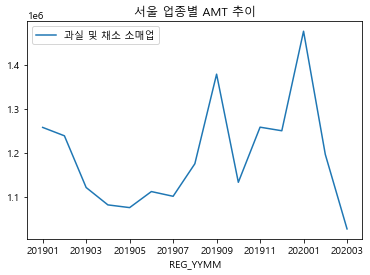

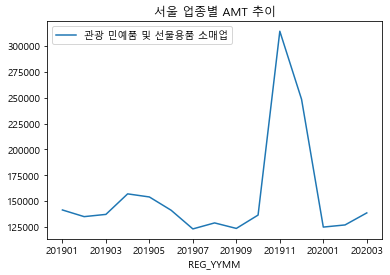

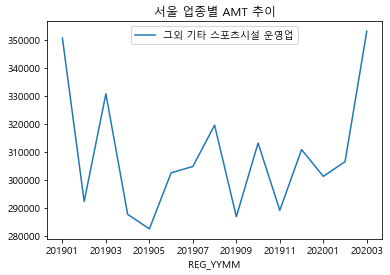

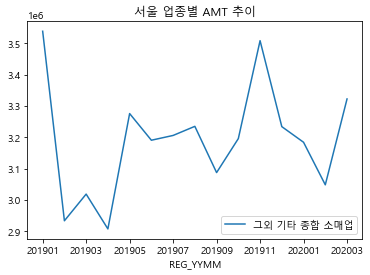

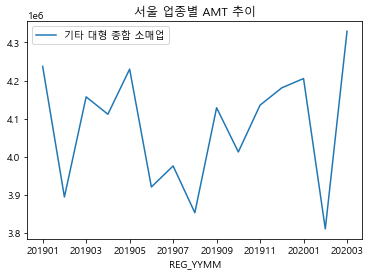

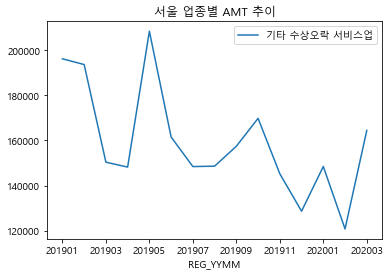

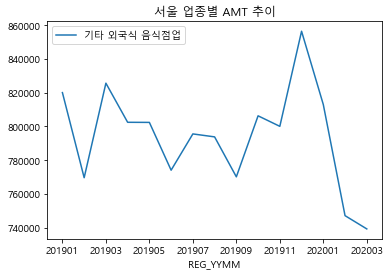

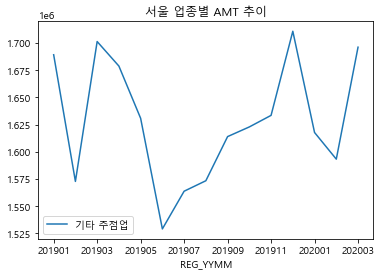

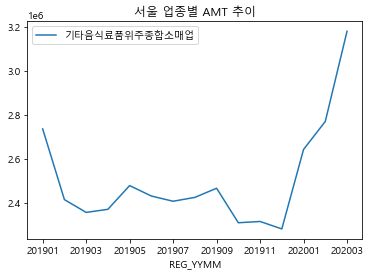

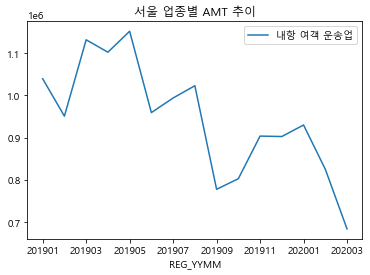

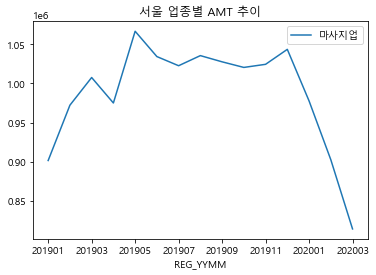

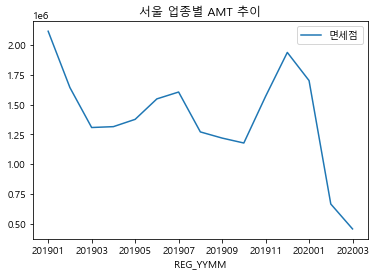

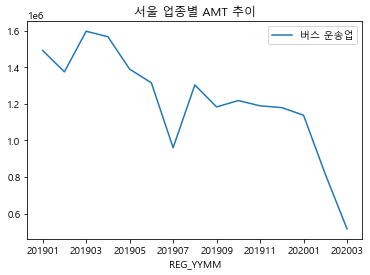

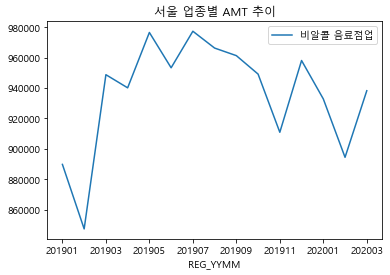

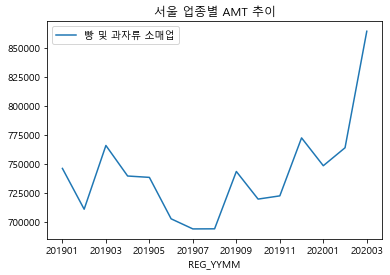

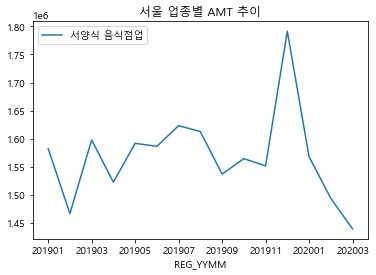

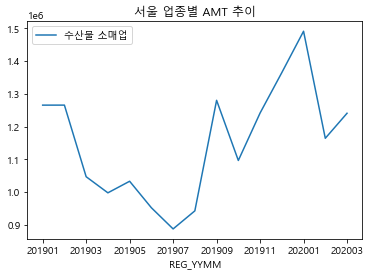

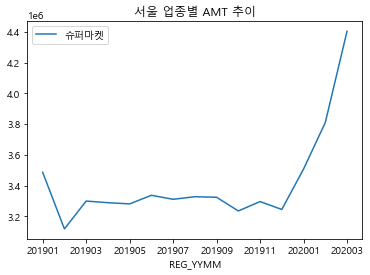

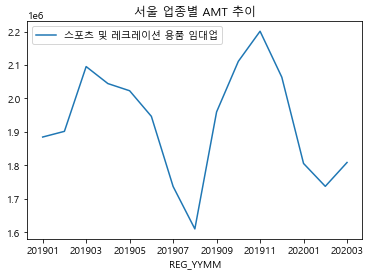

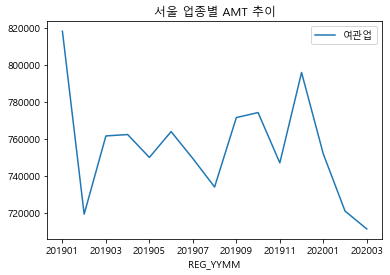

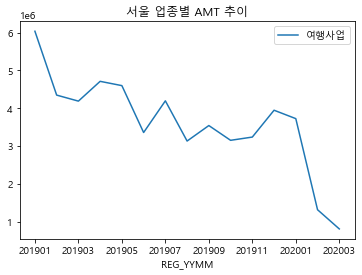

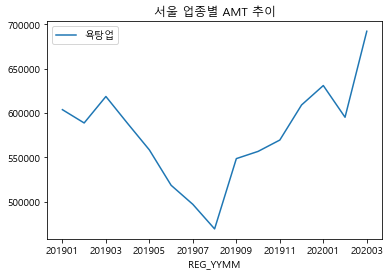

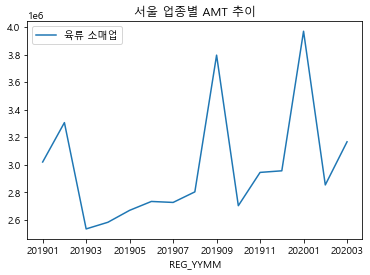

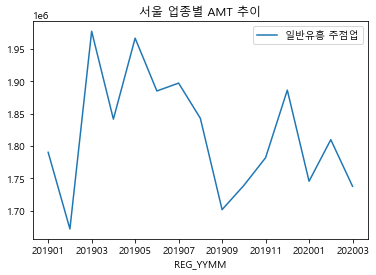

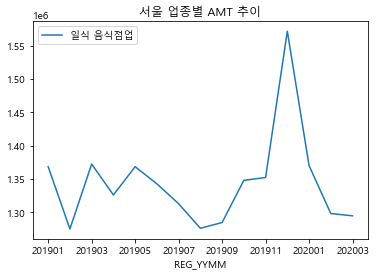

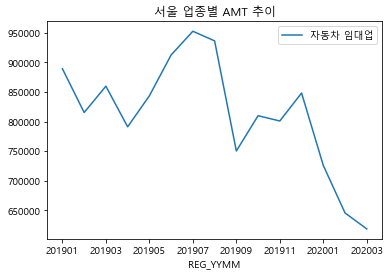

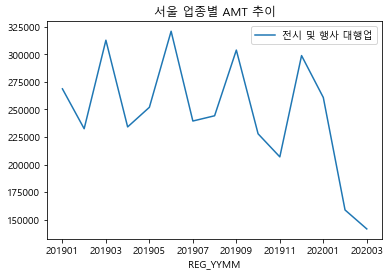

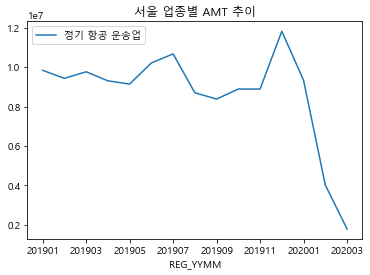

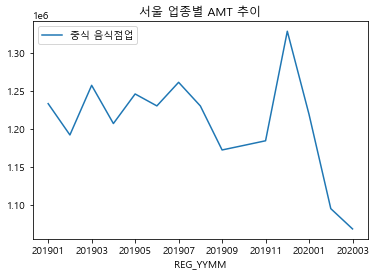

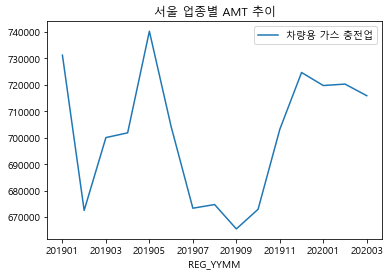

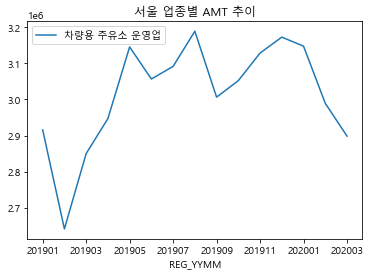

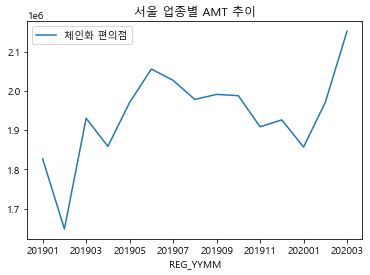

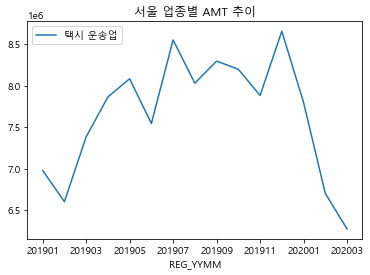

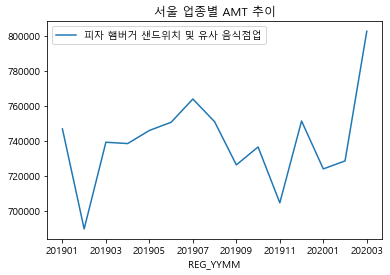

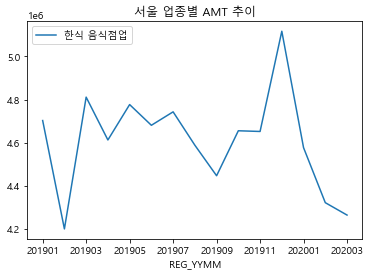

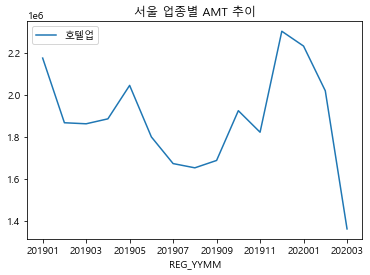

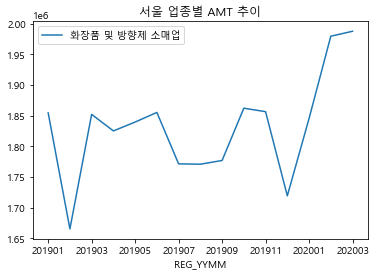

In [29]:
seoul_yeup_AMT = seoul.pivot_table('AMT', index = 'REG_YYMM', columns = 'STD_CLSS_NM')

for i in range(0,39):
   seoul_yeup_AMT.iloc[:,i].to_frame().plot()
   plt.title('서울 업종별 AMT 추이')
   plt.show()

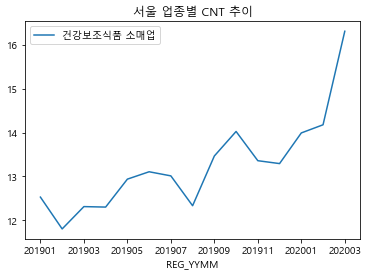

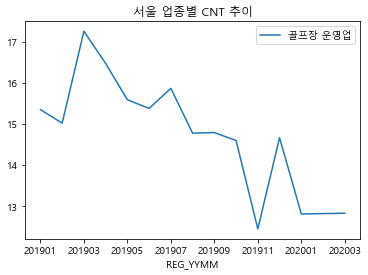

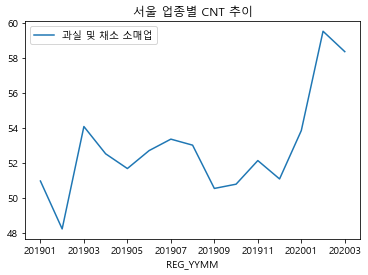

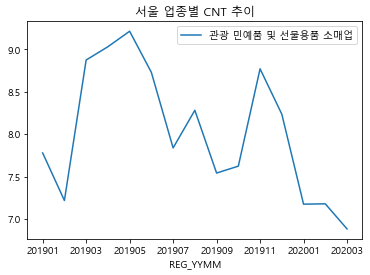

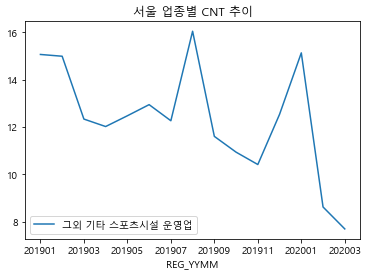

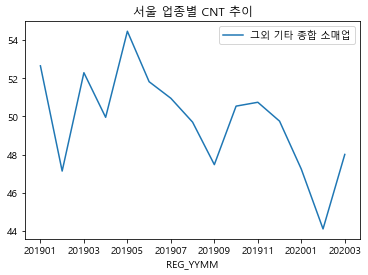

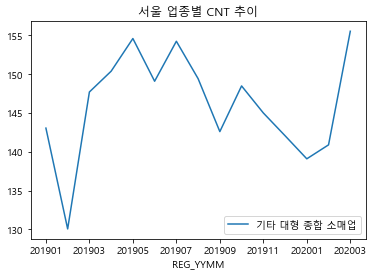

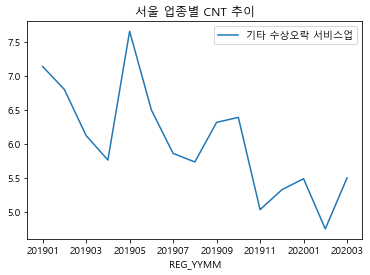

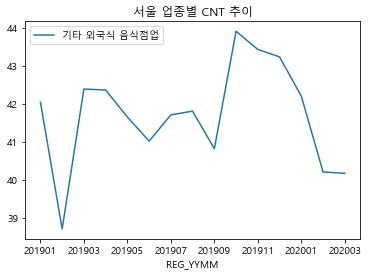

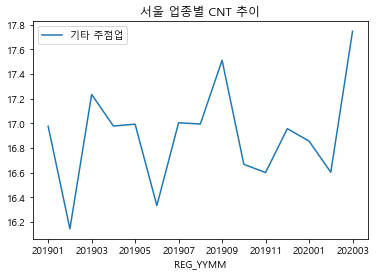

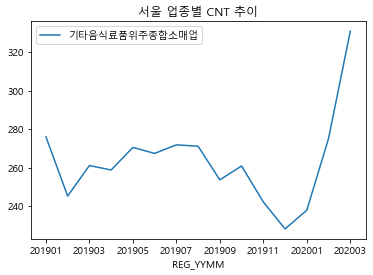

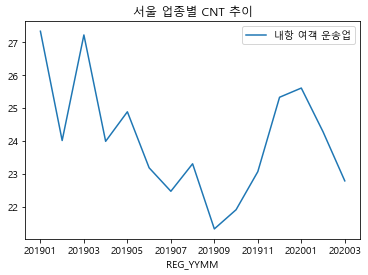

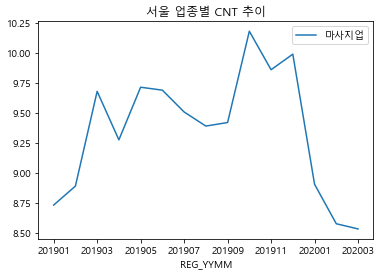

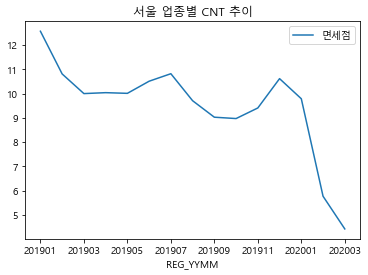

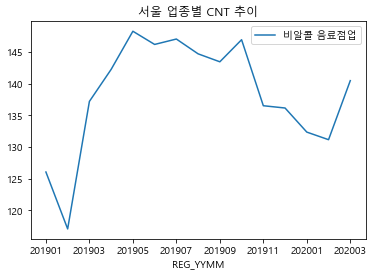

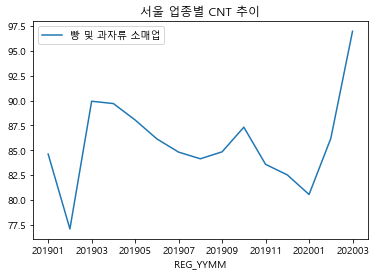

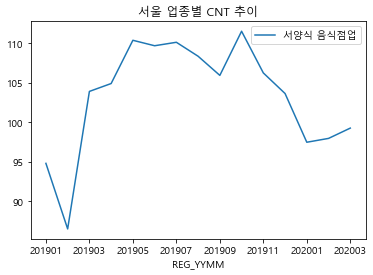

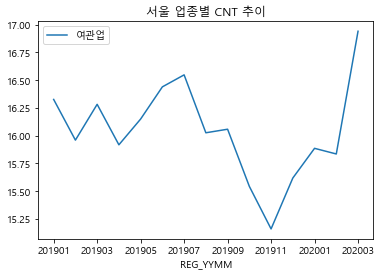

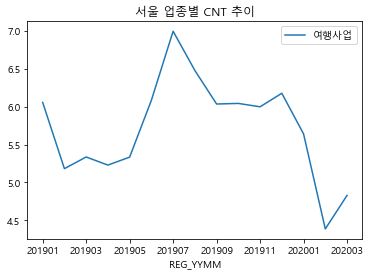

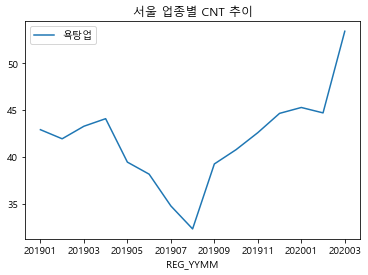

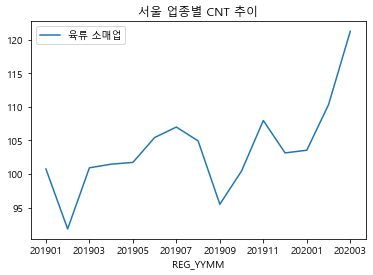

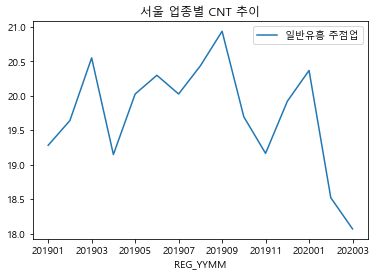

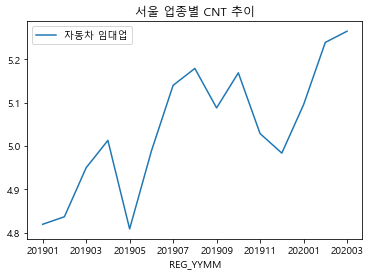

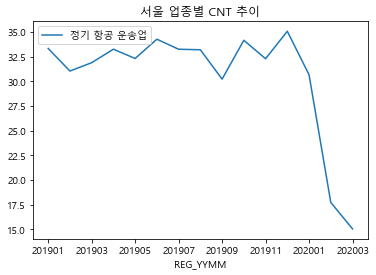

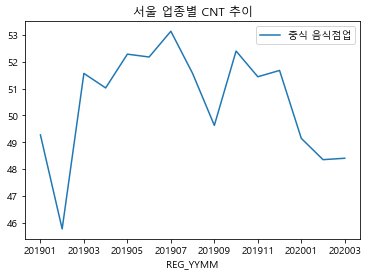

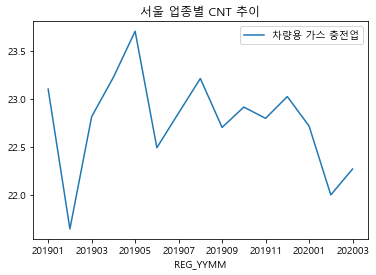

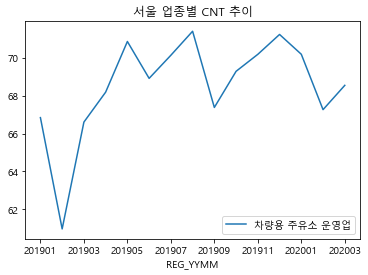

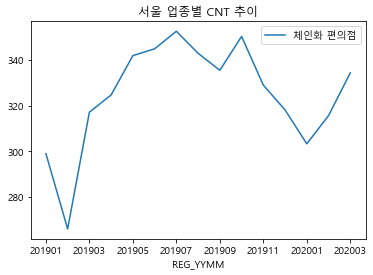

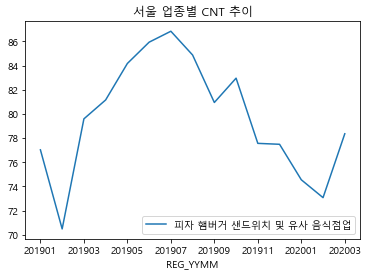

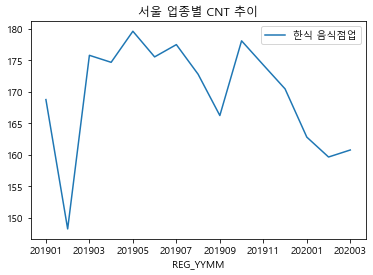

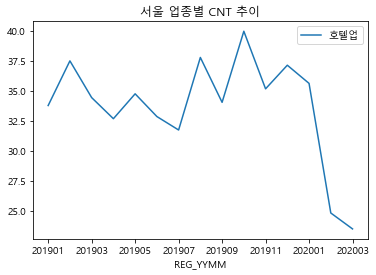

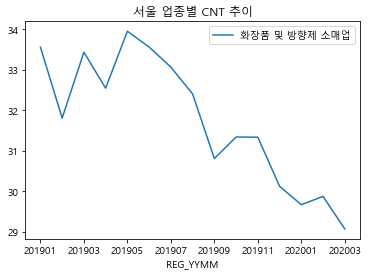

In [13]:
seoul_yeup = seoul.pivot_table('CNT', index = 'REG_YYMM', columns = 'STD_CLSS_NM')
for i in range(0,39):
   seoul_yeup.iloc[:,i].to_frame().plot()
   plt.title('서울 업종별 CNT 추이')
   plt.show()

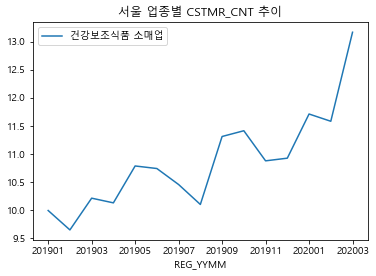

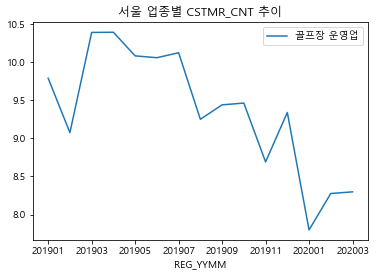

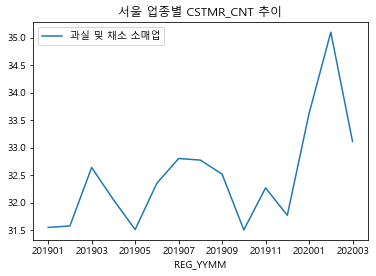

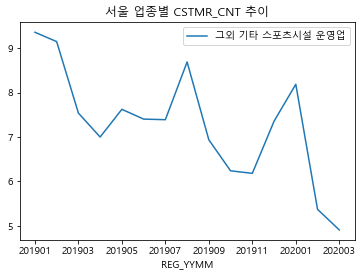

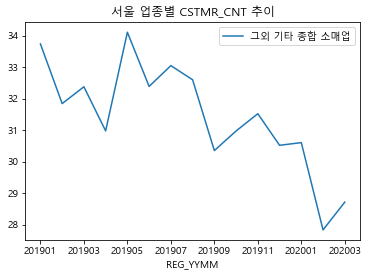

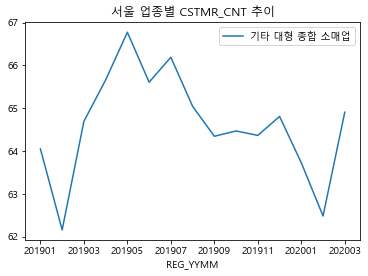

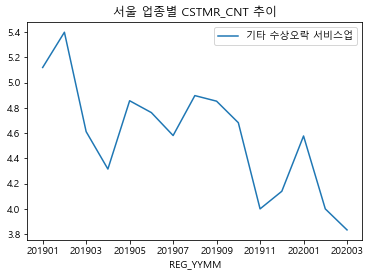

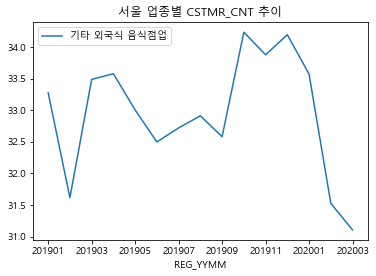

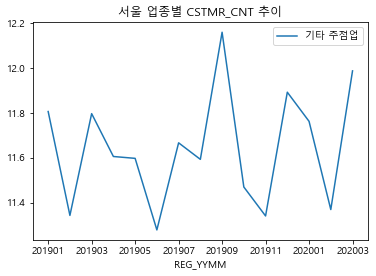

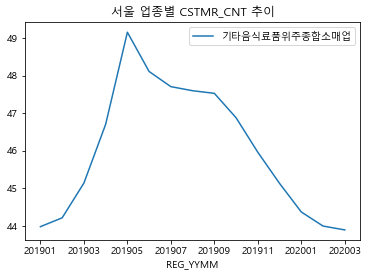

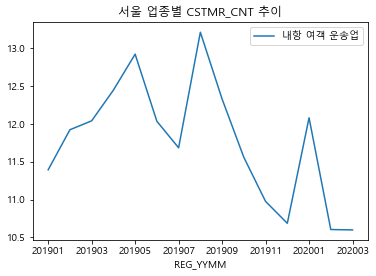

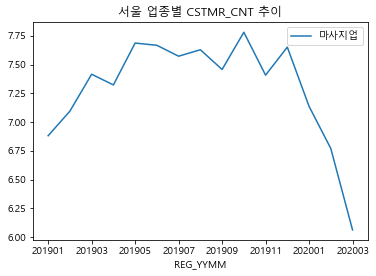

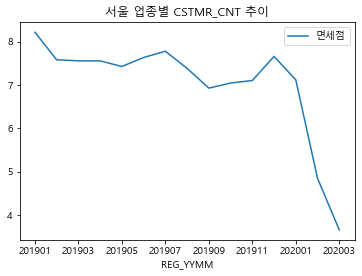

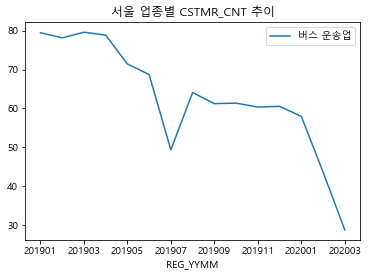

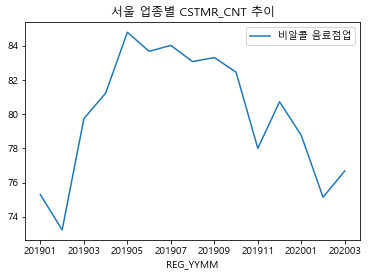

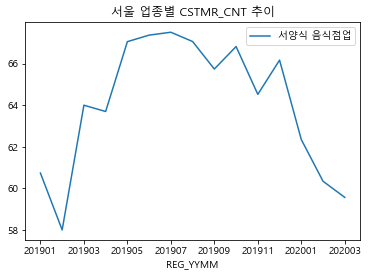

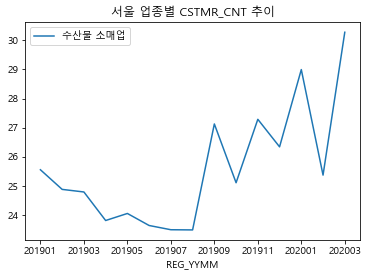

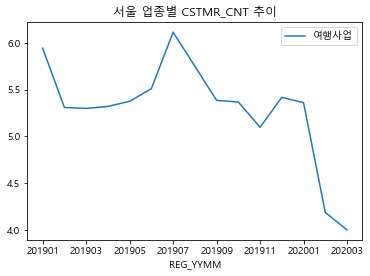

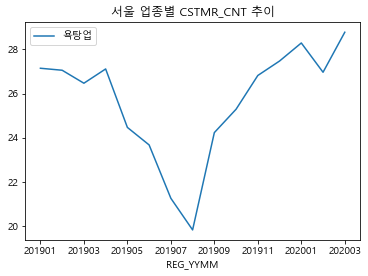

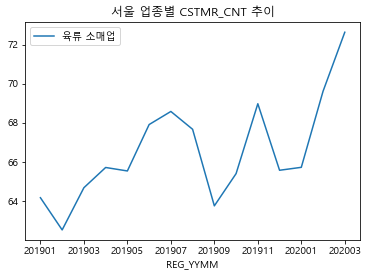

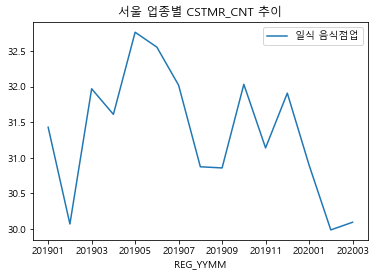

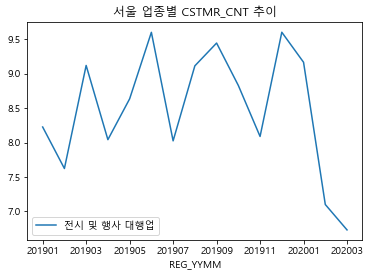

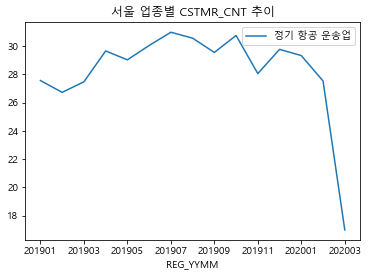

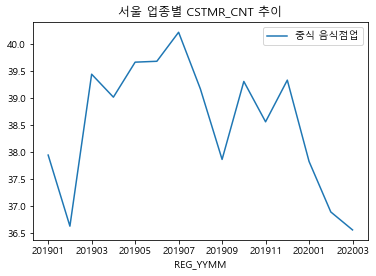

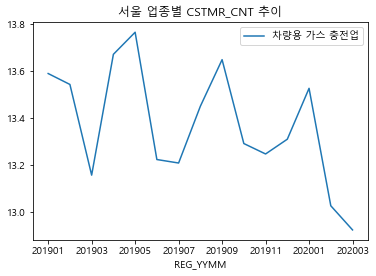

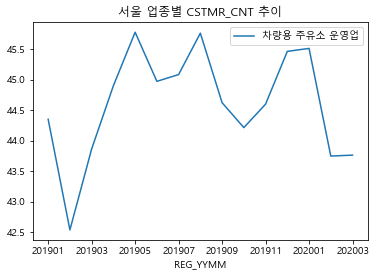

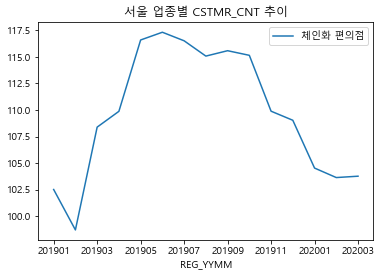

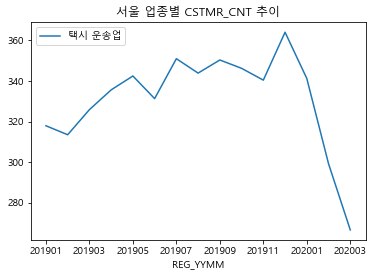

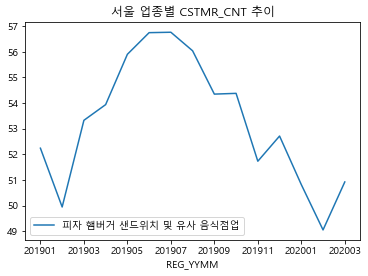

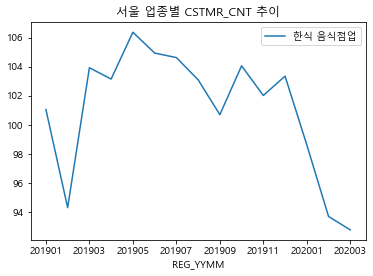

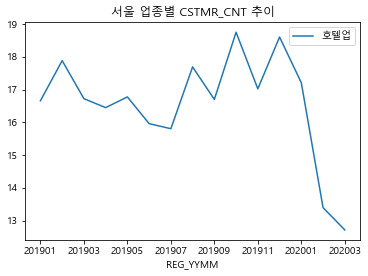

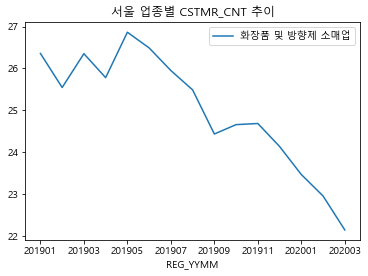

In [15]:
seoul_yeup_CCNT= seoul.pivot_table('CSTMR_CNT', index = 'REG_YYMM', columns = 'STD_CLSS_NM')
for i in range(0,39):
   seoul_yeup_CCNT.iloc[:,i].to_frame().plot()
   plt.title('서울 업종별 CSTMR_CNT 추이')
   plt.show()

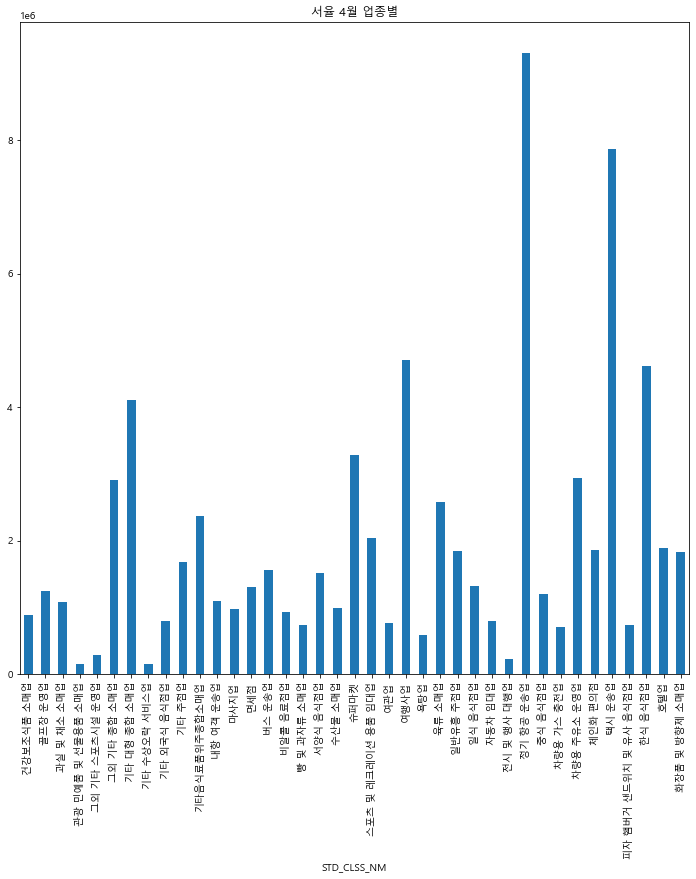

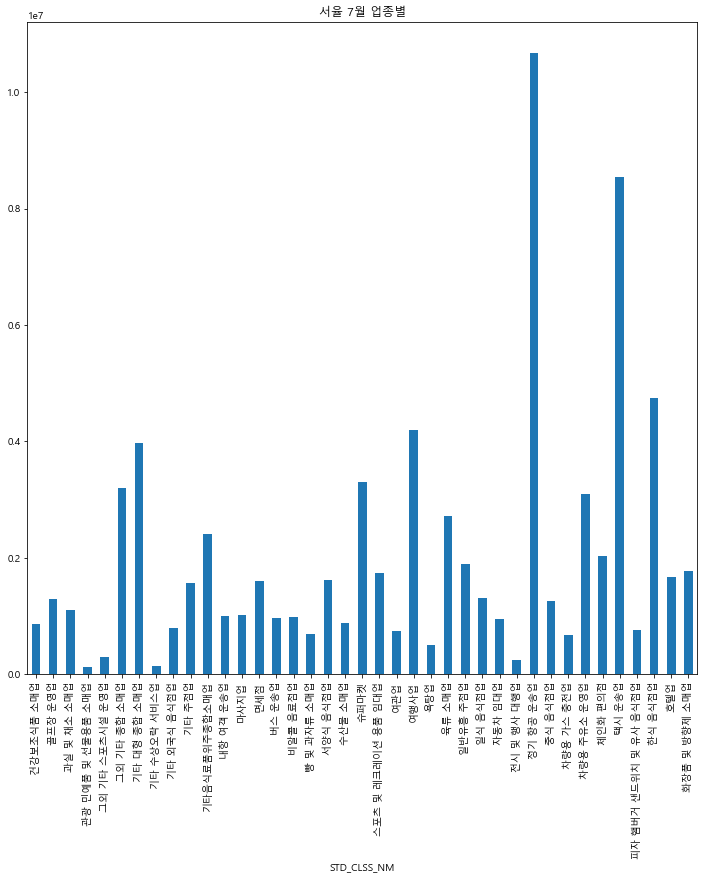

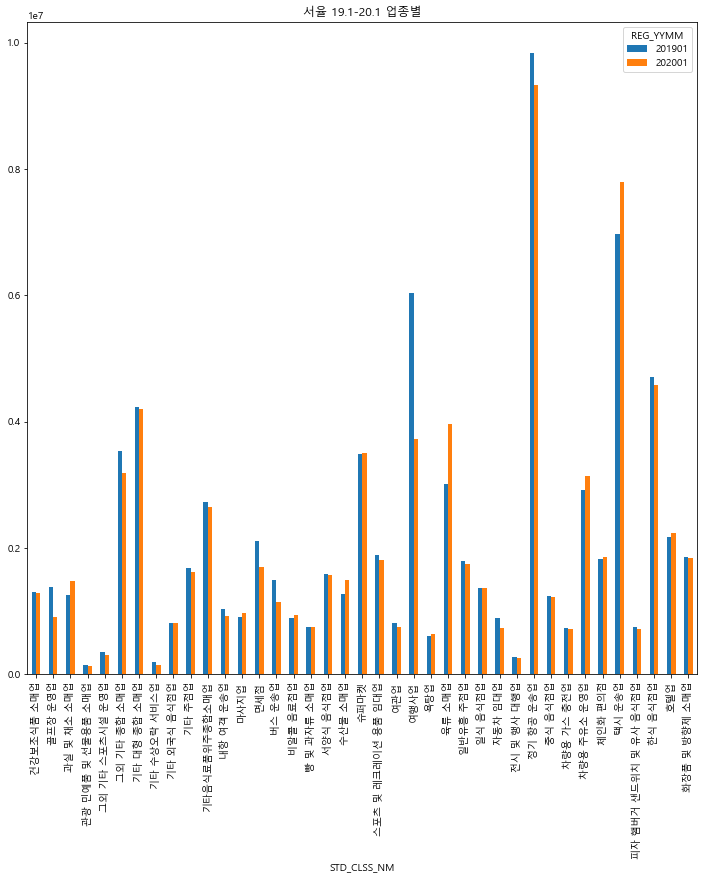

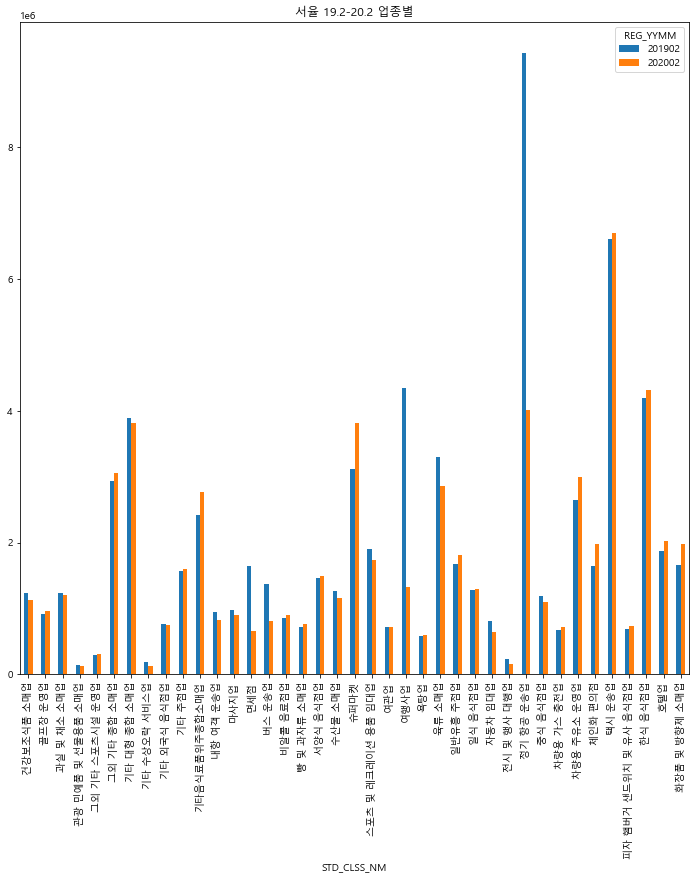

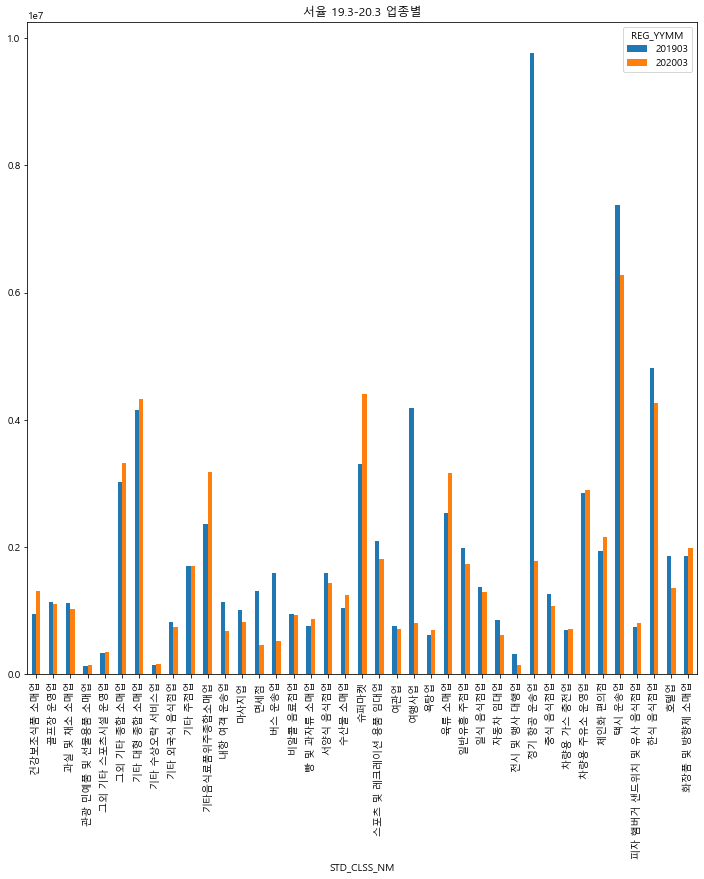

In [15]:
seoul1 =  seoul.pivot_table(index = 'STD_CLSS_NM', columns="REG_YYMM", values='AMT')

seoul1.iloc[:,3].plot.bar(figsize=(12,12))
plt.title('서율 4월 업종별')
plt.show()
seoul1.iloc[:,6].plot.bar(figsize=(12,12))
plt.title('서율 7월 업종별')
plt.show()
seoul1.iloc[:, [0,12]].plot.bar(figsize=(12,12))
plt.title('서율 19.1-20.1 업종별')
plt.show()
seoul1.iloc[:, [1,13]].plot.bar(figsize=(12,12))
plt.title('서율 19.2-20.2 업종별')
plt.show()
seoul1.iloc[:, [2,14]].plot.bar(figsize=(12,12))
plt.title('서율 19.3-20.3 업종별')
plt.show()